In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    random_state=10
)

In [4]:
X.shape

(500, 2)

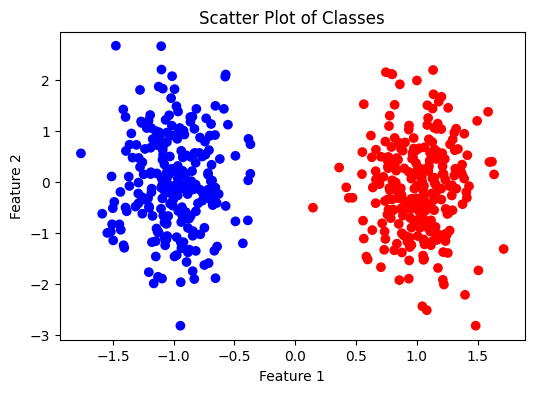

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Classes')
plt.show()

In [6]:
def step(X):
    return 1 if X > 0 else 0

In [7]:
def perceptron_trick(X, y, epochs):
    X = np.insert(X, 0, 1, axis = 1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    for i in range(epochs):
        k = np.random.randint(0, X.shape[0])
        y_hat = step(np.dot(X[k], weights))
        weights = weights + lr*(y[k] - y_hat)*X[k]
    return weights[0], weights[1:]

In [8]:
b, w = perceptron_trick(X, y, 200)

In [9]:
w0_ptrick = w[0]
w1_ptrick = w[1]

# Perceptron Trick

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X, y)

w_log = lr.coef_[0]
b_log = lr.intercept_[0]

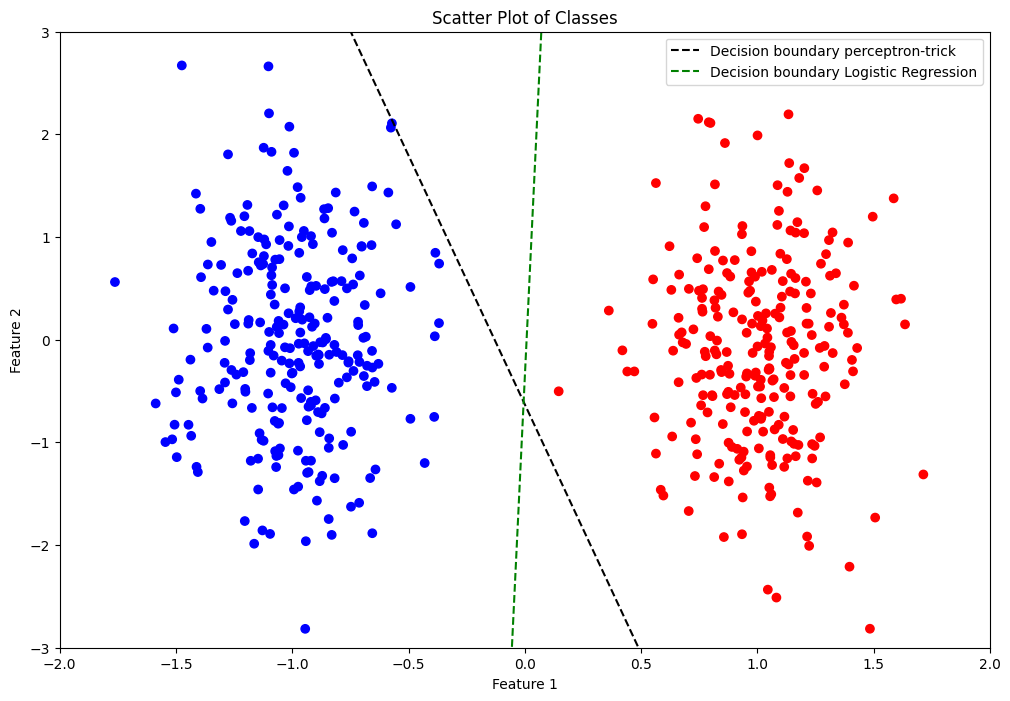

In [11]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Classes')

x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals_ptrick = -(w0_ptrick * x_vals + b) / w1_ptrick
plt.plot(x_vals, y_vals_ptrick, 'k--', label='Decision boundary perceptron-trick')

y_vals_log = -(w_log[0] * x_vals + b_log) / w_log[1]
plt.plot(x_vals, y_vals_log, 'g--', label='Decision boundary Logistic Regression')

plt.legend()
plt.xlim([-2, 2])
plt.ylim([-3, 3])
plt.show()



##### Perceptron Trick has its own problem since its working as per the data points position so once we iterate all the data points its not possible for us to reach the optimal solution

# Actual Loss Function Perceptron 

In [12]:
def perceptron(X, y, epochs):
    w0 = w1 = b = 1
    lr = 0.1
    y = np.where(y == 0, -1, 1)
    for j in range(epochs):
        for i in range(X.shape[0]):
            z = w0*X[i][0] + w1*X[i][1] + b 
            if z*y[i] < 0:
                w0 = w0 + lr*y[i]*X[i][0]
                w1 = w1 + lr*y[i]*X[i][1]
                b = b + lr*y[i]
    return w0, w1, b

In [13]:
w0_per, w1_per, b_per = perceptron(X, y, 100)

# Perceptron from Sklearn Library

In [14]:
from sklearn.linear_model import Perceptron
pr = Perceptron(alpha = 0.1)
pr.fit(X, y)
w = pr.coef_[0]
b = pr.intercept_[0]

In [15]:
w_prsk_0 = w[0]
w_prsk_1 = w[1]
b_prsk = b

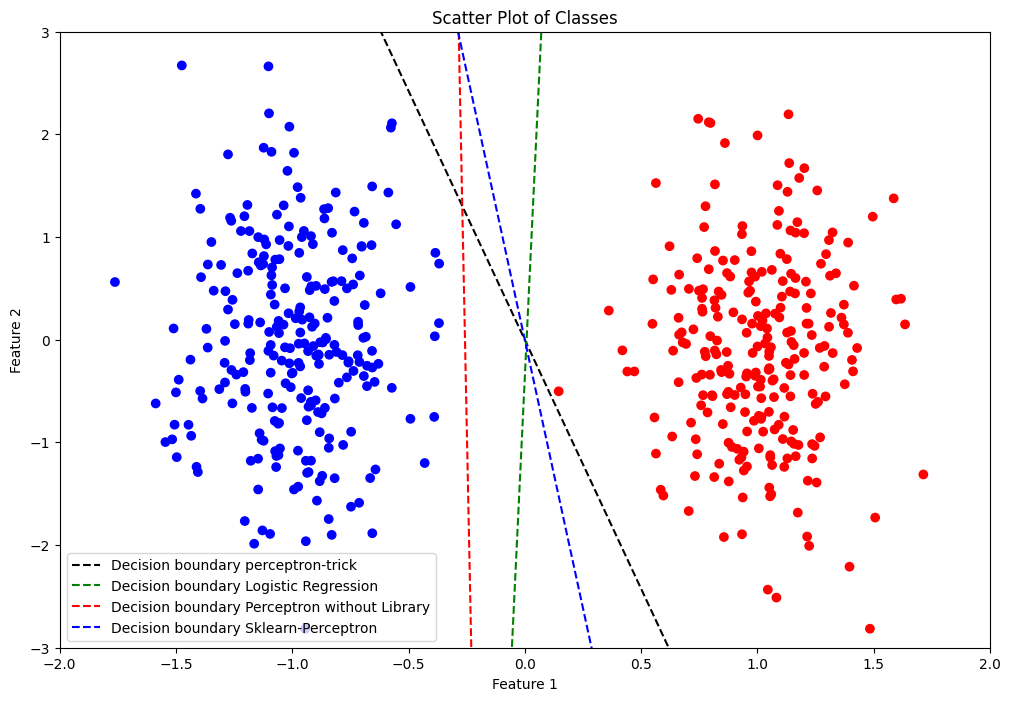

In [16]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Classes')

x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals_ptrick = -(w0_ptrick * x_vals + b) / w1_ptrick
plt.plot(x_vals, y_vals_ptrick, 'k--', label='Decision boundary perceptron-trick')

y_vals_log = -(w_log[0] * x_vals + b_log) / w_log[1]
plt.plot(x_vals, y_vals_log, 'g--', label='Decision boundary Logistic Regression')

y_vals_per = -(w0_per * x_vals + b_per) / w1_per
plt.plot(x_vals, y_vals_per, 'r--', label='Decision boundary Perceptron without Library')

y_vals_prsk = -(w_prsk_0 * x_vals + b_prsk) / w_prsk_1
plt.plot(x_vals, y_vals_prsk, 'b--', label='Decision boundary Sklearn-Perceptron')

plt.legend()
plt.xlim([-2, 2])
plt.ylim([-3, 3])
plt.show()



## Insights Generated

#### 1 - Why Perceptron in SKlearn and Our Model is having different Outputs?
##### Answer: 
######    Here we are using classic perceptron rule with sign activation and sklearn uses Hinge Loss as its loss function, 
###### which is similar to SVM being more robust and handles margin optimization
#### 2 - Why did we compare it with Logistic Regression?
##### Answer: 
###### In the field of Machine Learning, it is a popular saying that Logistic Regression and Perceptron behave similarly with data.

#### 3 - Drawback of Perceptron
##### Answer: 
###### We cannot achieve non-linear separability (handling non-linearly separable data) with perceptron.

